# HOW2 

The following notebook will walk you through some basic python that will help you create triangles and graphs.
Make sure you **run all of the code blocks in the order they appear** in this notebook, as they can depend on each other.
I have tried to make the variable names as self explanatory as possible.

If a line starts with #, then it is a comment and will explain the code it surrounds.


## Imports
In the cell below, all that is happening is we are importing the packages we will be using in this tutorial 

In [1]:
%matplotlib inline
import matplotlib
#from tabulate import tabulate
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Where we have written e.g. ```import matplotlib.pyplot as plt``` all this means is we are importing it and renaming it under an alias we choose. This just makes our lives easier as when we want to call the function, we can just type ```plt``` instead of
the entire ```matplotlib.pyplot```

The ```%matplotlib inline``` allows us to view the graphs in this notebook

# Gross Premiums Received

In the section below, we will create triangles and graphs relating to the 'Gross Premiums Received' from the data in the data.csv file.

## Reading from a .csv File

In the cell below, we are reading the data in the claims.csv file into a DataFrame (using the ```pd.read_csv(FILENAME)``` function). A DataFrame is basically just a spreadsheet. You can name the DataFrame anything, in this example, we have chosen the variable name df.

We don't want commas to be polluting our numbers so, to remove them, use ```df = df.replace(',','', regex = True)``` where the ```regex = True``` option will also replace commas inside substrings

I'm also going to convert the "Processing Month" column to type string, so it is subscriptable. This will be useful in a later exercise

The ```display(df)``` command will print a pretty table displaying the DataFrame.

In [2]:
df = pd.read_csv('claims.csv')

df.replace(',','', regex = True, inplace=True)

# here we just change the pandas settings so we can see all the rows in the tables. You can change it if you would like. 
# see what happens when you change None to 4 (make sure to change it back afterwards for the rest of the tutorial)
pd.set_option("display.max_rows", None)

# I am converting this column to type string so i can do string slicing on it later
df['Processing Month'] = df['Processing Month'].astype('str')

#I am converting the Gross Premiums Received, Gross Paid Claims, Gross Incurred Claims columns to integer
df[['Gross Premiums Received', 'Gross Paid Claims', 'Gross Incurred Claims']] = df[['Gross Premiums Received', 'Gross Paid Claims', 'Gross Incurred Claims']].astype('int')

display(df)

# an alternative to display() is print(tabulate(df, headers = 'keys', tablefmt = 'pretty')), if you want to use it, uncomment
# it in the imports and install it on your machine

Underwriting YoA Processing Month  Gross Premiums Received  \
0                2013           201301                   322983   
1                2013           201302                  5083516   
2                2013           201303                  8812441   
3                2013           201304                 12751060   
4                2013           201305                 13346743   
5                2013           201306                 15993573   
6                2013           201307                 17618810   
7                2013           201308                 20333060   
8                2013           201309                 22002371   
9                2013           201310                 23991350   
10               2013           201311                 27751423   
11               2013           201312                 29622534   
12               2013           201401                 32191017   
13               2013           201402                 34410535   
14               2013           201403                 36561450   
15               2013           201404                 38949612   
16               2013           201405                 40884665   
17               2013           201406                 42243166   
18               2013           201407                 44294756   
19               2013           201408                 45232258   
20               2013           201409                 46398802   
21               2013           201410                 48569422   
22               2013           201411                 49333352   
23               2013           201412                 50580042   
24               2013           201501                 51109657   
25               2013           201502                 51593285   
26               2013           201503                 52761633   
27               2013           201504                 52799879   
28               2013           201505                 52784193   
29               2013           201506                 53214864   
30               2013           201507                 53501444   
31               2013           201508                 53828788   
32               2013           201509                 53817003   
33               2013           201510                 53510496   
34               2013           201511                 53466006   
35               2013           201512                 53555346   
36               2013           201601                 53567553   
37               2013           201602                 53583020   
38               2013           201603                 53608819   
39               2013           201604                 53638795   
40               2013           201605                 53630330   
41               2013           201606                 53590474   
42               2013           201607                 53593728   
43               2013           201608                 53594516   
44               2013           201609                 53595571   
45               2013           201610                 53685460   
46               2013           201611                 53604982   
47               2013           201612                 53617097   
48               2013           201701                 53584037   
49               2013           201702                 53591945   
50               2013           201703                 53596927   
51               2013           201704                 53385656   
52               2013           201705                 53515182   
53               2013           201706                 53510028   
54               2013           201707                 53520400   
55               2013           201708                 53440068   
56               2013           201709                 53439639   
57               2013           201712                 53310131   
58               2014           201401              

# Displaying a triangle

We will be using a built in pandas function to create our triangles. 

# Gross Premiums Received

We want to create a pivot table with the Underwriting YoA against the Development period. 

## Finding the development periods
The development period values are held in another column in our DataFrame, but as an extra challenge, lets instead infer it from the processing months.
Lets find the development period using vector calculations. The formula we want to use is: (Processing year - Underwriting YoA) *12 + Processing month

We can start by splitting Processing Month into two columns: Processing Year and Processing Month.

In [3]:
# creating a DataFrame with the 3 columns we will need
vec_gross_prems_piv= df[['Underwriting YoA','Processing Month','Gross Premiums Received']].copy()

# making'Processing Month' into 2 columns: 'Processing Month' and 'Processing Year'
# using a built in function str to string slice every value in column aand then converting it to integers again
# so we can use the values in our calculations
vec_gross_prems_piv['Processing Year'] = vec_gross_prems_piv['Processing Month'].str[:4].astype('int')
vec_gross_prems_piv['Processing Month'] = vec_gross_prems_piv['Processing Month'].str[4:6].astype('int')

#using our formula to create a list containing the development periods
dev_period = []
dev_period = (vec_gross_prems_piv['Processing Year']-vec_gross_prems_piv['Underwriting YoA'])*12 + vec_gross_prems_piv['Processing Month']
vec_gross_prems_piv['Development period'] = dev_period

## Create a Triangle using Pivot Tables

We can now create the triangle from our DataFrame using the [pd.pivot_table function](https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html). We will also insert a "Grand Total" row and column.

the ```margins = True``` inserts a Totals row and column using the ```margins_name = 'Grand Total'``` as the titles.

In [4]:
table_gross_prems = pd.pivot_table(vec_gross_prems_piv, values='Gross Premiums Received', index=['Underwriting YoA'],
                    columns=['Development period'],aggfunc= {"Gross Premiums Received":np.sum} ,margins = True, 
                    margins_name = 'Grand Total')

display(table_gross_prems)

Development period          1           2           3           4           5  \
Underwriting YoA                                                                
2013                 322983.0   5083516.0   8812441.0  12751060.0  13346743.0   
2014                 429263.0   3664094.0   9070001.0   9807319.0  12577434.0   
2015                 273587.0   6350506.0   7990355.0   9695011.0  12016329.0   
2016                 188806.0   4992894.0   6578719.0   8802753.0  10685937.0   
2017                 323277.0   4745863.0   6467620.0   7249042.0   9699436.0   
Grand Total         1537916.0  24836873.0  38919136.0  48305185.0  58325879.0   

Development period           6           7           8            9  \
Underwriting YoA                                                      
2013                15993573.0  17618810.0  20333060.0   22002371.0   
2014                14233825.0  17366342.0  19848826.0   22048733.0   
2015                13445556.0  15882387.0  18896115.0   20951776.0   
2016                12302122.0  16527614.0  18590920.0   25479747.0   
2017                12050793.0  14246337.0  18118460.0   19887995.0   
Grand Total         68025869.0  81641490.0  95787381.0  110370622.0   

Development period          10  ...          50          51          52  \
Underwriting YoA                ...                                       
2013                23991350.0  ...  53591945.0  53596927.0  53385656.0   
2014                24676600.0  ...         NaN         NaN         NaN   
2015                23468360.0  ...         NaN         NaN         NaN   
2016                22452988.0  ...         NaN         NaN         NaN   
2017                       NaN  ...         NaN         NaN         NaN   
Grand Total         94589298.0  ...  53591945.0  53596927.0  53385656.0   

Development period          53          54          55          56  \
Underwriting YoA                                                     
2013                53515182.0  53510028.0  53520400.0  53440068.0   
2014                       NaN         NaN         NaN         NaN   
2015                       NaN         NaN         NaN         NaN   
2016                       NaN         NaN         NaN         NaN   
2017                       NaN         NaN         NaN         NaN   
Grand Total         53515182.0  53510028.0  53520400.0  53440068.0   

Development period          57          60  Grand Total  
Underwriting YoA                                         
2013                53439639.0  53310131.0   2521425893  
2014                       NaN         NaN   1748297800  
2015                       NaN         NaN   1097316582  
2016                       NaN         NaN    546597547  
2017                       NaN         NaN    119520458  
Grand Total         53439639.0  53310131.0   6033158280  

[6 rows x 59 columns]

## Displaying Graphs

In this next section we will display the Gross Premiums as a graph similar to this (we won't let it drop down):
![](Gross_premiums_graph_example.png)

### Plot the graph

If you use ```df.plot.line()``` it plots all the numerical columns as separate lines. We can't just straight away plot the pivot table using .plot.line() because it will plot the wrong indexes, we want to transpose it first. If you want further explanation, read the [documentation for .plot.line()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.line.html).    

We will use our pivot table, but we will first remove the "Grand Total" from the column and row.

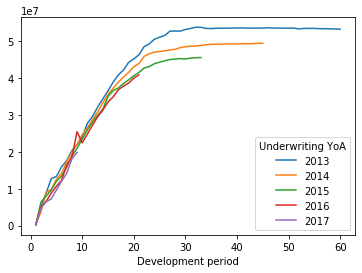

In [5]:
# remove the Totals columns 
table_gross_prems.drop('Grand Total', inplace=True, axis = 1)
table_gross_prems.drop('Grand Total', inplace=True, axis = 0)

# plot the graph
ax = table_gross_prems.transpose().plot.line()


# "print" the graph
plt.show()

### Add the axis labels, etc

You may want to clean up the graph a bit by adding axes labels and a title.  
It might also be worth changing the settings so all your graphs appear bigger.  
You may also want to be able to save the graph as an image.  
If you are struggling with this, or want to know more, the [matplotlib documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html) will help, and so will the [pandas.DataFrame.plot documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html).

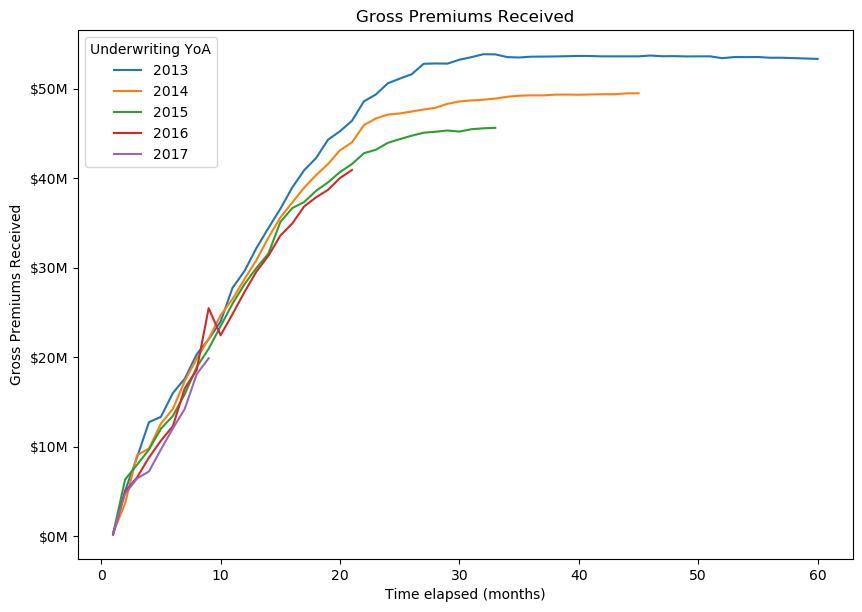

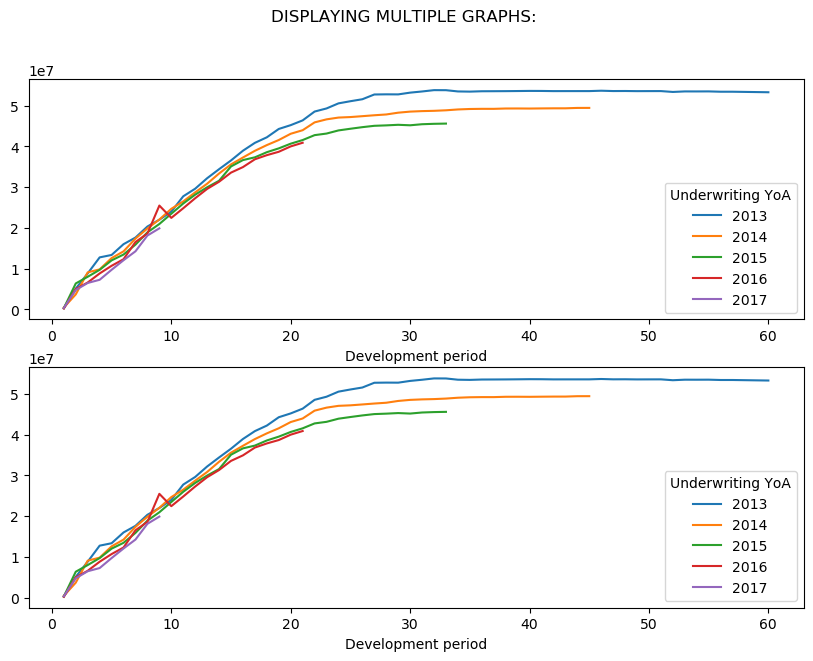

In [6]:
# makes our graph a little bit bigger
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize']=(10, 7)

# plot our DataFrame  
ax = table_gross_prems.transpose().plot.line()

# create axes labels and title the graph
ax.set(xlabel='Time elapsed (months)', ylabel='Gross Premiums Received', title='Gross Premiums Received')

#If you want to display the y axis as $50M, you can create a function to do this (we can then call this later on)
def yaxisFormatting(x, y):
    return str('${:.0f}'.format(x/1000000) +'M')
                                      
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(yaxisFormatting))

# If you want to display the y axis in the form $50,000,000, comment out the line above and uncomment the line below
#plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('${x:,.0f}'))

# this will save the graph as an image, search in the directory you are in and open it
plt.savefig('gross_prem_graph.png')

# if you wanted to plot multiple graphs in the same figure, this is also possible 
# if you wanted to display the graphs as next to each other, change fig, axes = plt.subplots(1,2)
fig1, axes = plt.subplots(2)

#setting a figure title
fig1.suptitle('DISPLAYING MULTIPLE GRAPHS:')

# im just plotting the same graph twice. If you want to plot different ones, change a table_gross_prems.transpose() to the name of a different DataFrame
table_gross_prems.transpose().plot(ax= axes[0]) 
table_gross_prems.transpose().plot(ax= axes[1]) 

# "print" the graphs
plt.show()

# Gross Incurred Claims

Lets repeat the process for Gross Incurred Claims. We already worked out the development period, so we can just append it to the DataFrame.

In [7]:
# create a DataFrame with the colums we need
gross_inc_piv= df[['Underwriting YoA','Processing Month','Gross Incurred Claims']].copy()

# create a new column containing the development periods
gross_inc_piv['Development period'] = dev_period

# create our pivot table
table_gross_inc = pd.pivot_table(gross_inc_piv, values='Gross Incurred Claims', index=['Underwriting YoA'],
                  columns=['Development period'],aggfunc= {"Gross Incurred Claims":np.sum} ,margins = True, 
                    margins_name = 'Grand Total')

display(table_gross_inc)

Development period        1         2         3          4          5  \
Underwriting YoA                                                        
2013                    0.0  112500.0  183023.0   259558.0   509828.0   
2014                    0.0     433.0   14894.0    95591.0   200019.0   
2015                 1960.0   16208.0   23528.0   397588.0   417307.0   
2016                21443.0   60130.0  115003.0   180221.0   311315.0   
2017                20425.0   47587.0  173139.0   262230.0   334306.0   
Grand Total         43828.0  236858.0  509587.0  1195188.0  1772775.0   

Development period          6          7          8           9          10  \
Underwriting YoA                                                              
2013                 759277.0  1115204.0  1832746.0   3068456.0   7017086.0   
2014                 538744.0   919686.0   969792.0   2723357.0   3267343.0   
2015                 870758.0  1496336.0  1899844.0   3858497.0   4751811.0   
2016                 402268.0   688563.0  1372081.0   2445388.0   2644478.0   
2017                 687749.0  1011248.0  1397151.0   1772532.0         NaN   
Grand Total         3258796.0  5231037.0  7471614.0  13868230.0  17680718.0   

Development period  ...          50          51          52          53  \
Underwriting YoA    ...                                                   
2013                ...  22322502.0  22330182.0  22460708.0  22562529.0   
2014                ...         NaN         NaN         NaN         NaN   
2015                ...         NaN         NaN         NaN         NaN   
2016                ...         NaN         NaN         NaN         NaN   
2017                ...         NaN         NaN         NaN         NaN   
Grand Total         ...  22322502.0  22330182.0  22460708.0  22562529.0   

Development period          54          55          56          57  \
Underwriting YoA                                                     
2013                22548881.0  22665350.0  22688224.0  22680747.0   
2014                       NaN         NaN         NaN         NaN   
2015                       NaN         NaN         NaN         NaN   
2016                       NaN         NaN         NaN         NaN   
2017                       NaN         NaN         NaN         NaN   
Grand Total         22548881.0  22665350.0  22688224.0  22680747.0   

Development period          60  Grand Total  
Underwriting YoA                             
2013                22735758.0    931559611  
2014                       NaN    608718608  
2015                       NaN    311451604  
2016                       NaN    140891697  
2017                       NaN      9636993  
Grand Total         22735758.0   2002258513  

[6 rows x 59 columns]

## Displaying the graph

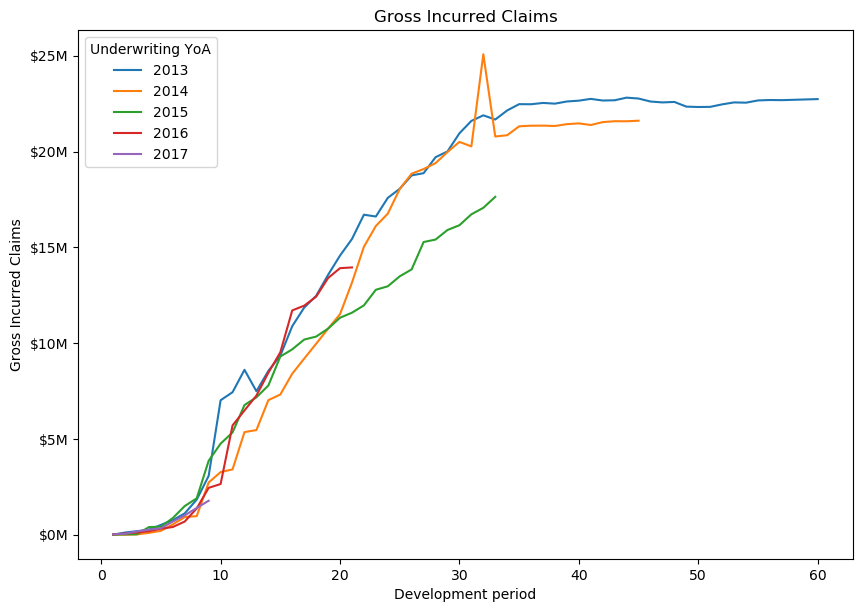

In [8]:
# remove the Totals column and row
table_gross_inc.drop('Grand Total', inplace=True, axis = 1)
table_gross_inc.drop('Grand Total', inplace=True, axis = 0)

#transpose the table so it plots the graph how we would like
ax = table_gross_inc.transpose().plot.line()

#change axis labels
ax.set(xlabel='Development period', ylabel='Gross Incurred Claims', title='Gross Incurred Claims')
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(yaxisFormatting))
plt.show()

# Gross Paid Claims
 
We will now do the same for the Gross Paid Claims

In [9]:
# create our dataframe 
gross_paid_piv= df[['Underwriting YoA','Processing Month','Gross Paid Claims']].copy()
gross_paid_piv['Development period'] = dev_period

# create our pivot table
table_gross_paid = pd.pivot_table(gross_paid_piv, values='Gross Paid Claims', index=['Underwriting YoA'],
                   columns=['Development period'],aggfunc= {"Gross Paid Claims":np.sum} ,margins = True, 
                    margins_name = 'Grand Total')

display(table_gross_paid)

Development period        1         2         3         4         5  \
Underwriting YoA                                                      
2013                    0.0  112500.0  124813.0  153152.0  199386.0   
2014                    0.0       0.0    4663.0   41217.0   88016.0   
2015                 1960.0   16208.0   23528.0   56876.0  313208.0   
2016                21443.0   29074.0   64746.0   95592.0  202753.0   
2017                11655.0   28025.0  101185.0  136141.0  147393.0   
Grand Total         35058.0  185807.0  318935.0  482978.0  950756.0   

Development period          6          7          8          9         10  \
Underwriting YoA                                                            
2013                 371695.0   558040.0   967848.0  1277353.0  2625446.0   
2014                 358287.0   697917.0   773569.0  1088687.0  1477936.0   
2015                 407098.0   625755.0   760768.0  1398401.0  2324353.0   
2016                 293918.0   434659.0   932462.0  1486359.0  1615246.0   
2017                 384807.0   603797.0   855912.0  1269396.0        NaN   
Grand Total         1815805.0  2920168.0  4290559.0  6520196.0  8042981.0   

Development period  ...          50          51          52          53  \
Underwriting YoA    ...                                                   
2013                ...  21105841.0  21122431.0  21140731.0  21288996.0   
2014                ...         NaN         NaN         NaN         NaN   
2015                ...         NaN         NaN         NaN         NaN   
2016                ...         NaN         NaN         NaN         NaN   
2017                ...         NaN         NaN         NaN         NaN   
Grand Total         ...  21105841.0  21122431.0  21140731.0  21288996.0   

Development period          54          55          56          57  \
Underwriting YoA                                                     
2013                21294942.0  21506043.0  21532392.0  21526132.0   
2014                       NaN         NaN         NaN         NaN   
2015                       NaN         NaN         NaN         NaN   
2016                       NaN         NaN         NaN         NaN   
2017                       NaN         NaN         NaN         NaN   
Grand Total         21294942.0  21506043.0  21532392.0  21526132.0   

Development period          60  Grand Total  
Underwriting YoA                             
2013                21625972.0    782085737  
2014                       NaN    508331939  
2015                       NaN    235518350  
2016                       NaN     77010594  
2017                       NaN      6180449  
Grand Total         21625972.0   1609127069  

[6 rows x 59 columns]

## Displaying the graph

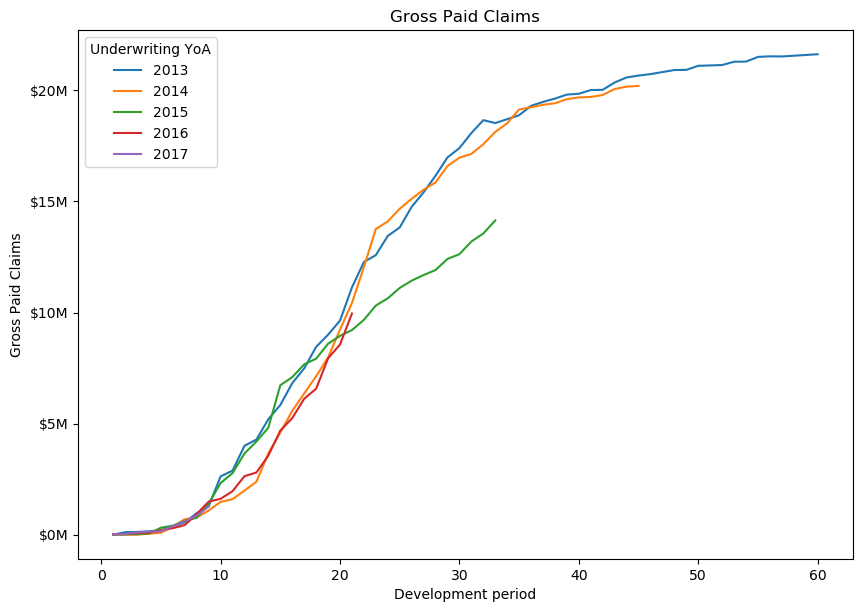

In [10]:
# remove the totals column and row 
table_gross_paid.drop('Grand Total', inplace=True, axis = 1)
table_gross_paid.drop('Grand Total', inplace=True, axis = 0)


# transpose the table so it plots the graph how we would like
ax = table_gross_paid.transpose().plot.line()

#change axis labels
ax.set(xlabel='Development period', ylabel='Gross Paid Claims', title='Gross Paid Claims')
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(yaxisFormatting))
plt.show()

# What to do if your data isn't cumulative

We have the file where the data is not cumulative: claims2.csv. In this section, we will adjust the data until it is.

In [11]:
df2 = pd.read_csv('claims2.csv')

df2.dropna(inplace = True, thresh = 2)
df2.replace(',','', regex = True, inplace=True)
#convert the Gross Premiums Received, Gross Paid Claims, Gross Incurred Claims columns to int
df2[['Gross Premiums Received', 'Gross Paid Claims', 'Gross Incurred Claims']] = df[['Gross Premiums Received', 
                                                                                     'Gross Paid Claims', 
                                                                                     'Gross Incurred Claims']].astype('int')

pd.set_option("display.max_rows", None)
display(df2)

Underwriting YoA  Processing Month  Gross Premiums Received  \
0                2013            201301                   322983   
1                2013            201302                  5083516   
2                2013            201303                  8812441   
3                2013            201304                 12751060   
4                2013            201305                 13346743   
5                2013            201306                 15993573   
6                2013            201307                 17618810   
7                2013            201308                 20333060   
8                2013            201309                 22002371   
9                2013            201310                 23991350   
10               2013            201311                 27751423   
11               2013            201312                 29622534   
12               2013            201401                 32191017   
13               2013            201402                 34410535   
14               2013            201403                 36561450   
15               2013            201404                 38949612   
16               2013            201405                 40884665   
17               2013            201406                 42243166   
18               2013            201407                 44294756   
19               2013            201408                 45232258   
20               2013            201409                 46398802   
21               2013            201410                 48569422   
22               2013            201411                 49333352   
23               2013            201412                 50580042   
24               2013            201501                 51109657   
25               2013            201502                 51593285   
26               2013            201503                 52761633   
27               2013            201504                 52799879   
28               2013            201505                 52784193   
29               2013            201506                 53214864   
30               2013            201507                 53501444   
31               2013            201508                 53828788   
32               2013            201509                 53817003   
33               2013            201510                 53510496   
34               2013            201511                 53466006   
35               2013            201512                 53555346   
36               2013            201601                 53567553   
37               2013            201602                 53583020   
38               2013            201603                 53608819   
39               2013            201604                 53638795   
40               2013            201605                 53630330   
41               2013            201606                 53590474   
42               2013            201607                 53593728   
43               2013            201608                 53594516   
44               2013            201609                 53595571   
45               2013            201610                 53685460   
46               2013            201611                 53604982   
47               2013            201612                 53617097   
48               2013            201701                 53584037   
49               2013            201702                 53591945   
50               2013            201703                 53596927   
51               2013            201704                 53385656   
52               2013            201705                 53515182   
53               2013            201706                 53510028   
54               2013            201707                 53520400   
55               2013            201708                 53440068   
56               2013            201709                 53439639   
57               2013            201712                 53310

You can make a column cumulative by using the function cumsum(). We want to be more specific and want each year to have an individual cumulative sum. We can achieve this by using the groupby() function.

In [12]:
# you can see what the groupby() function does by uncommenting the line below
#display(df2.groupby(['Underwriting YoA'])['Gross Premiums Received'].count())

df2['Gross Premiums Received'] = df2.groupby(['Underwriting YoA'])['Gross Premiums Received'].cumsum()
df2['Gross Paid Claims'] = df2.groupby(['Underwriting YoA'])['Gross Paid Claims'].cumsum()
df2['Gross Incurred Claims'] = df2.groupby(['Underwriting YoA'])['Gross Incurred Claims'].cumsum()
display(df2)

Underwriting YoA  Processing Month  Gross Premiums Received  \
0                2013            201301                   322983   
1                2013            201302                  5406499   
2                2013            201303                 14218940   
3                2013            201304                 26970000   
4                2013            201305                 40316743   
5                2013            201306                 56310316   
6                2013            201307                 73929126   
7                2013            201308                 94262186   
8                2013            201309                116264557   
9                2013            201310                140255907   
10               2013            201311                168007330   
11               2013            201312                197629864   
12               2013            201401                229820881   
13               2013            201402                264231416   
14               2013            201403                300792866   
15               2013            201404                339742478   
16               2013            201405                380627143   
17               2013            201406                422870309   
18               2013            201407                467165065   
19               2013            201408                512397323   
20               2013            201409                558796125   
21               2013            201410                607365547   
22               2013            201411                656698899   
23               2013            201412                707278941   
24               2013            201501                758388598   
25               2013            201502                809981883   
26               2013            201503                862743516   
27               2013            201504                915543395   
28               2013            201505                968327588   
29               2013            201506               1021542452   
30               2013            201507               1075043896   
31               2013            201508               1128872684   
32               2013            201509               1182689687   
33               2013            201510               1236200183   
34               2013            201511               1289666189   
35               2013            201512               1343221535   
36               2013            201601               1396789088   
37               2013            201602               1450372108   
38               2013            201603               1503980927   
39               2013            201604               1557619722   
40               2013            201605               1611250052   
41               2013            201606               1664840526   
42               2013            201607               1718434254   
43               2013            201608               1772028770   
44               2013            201609               1825624341   
45               2013            201610               1879309801   
46               2013            201611               1932914783   
47               2013            201612               1986531880   
48               2013            201701               2040115917   
49               2013            201702               2093707862   
50               2013            201703               2147304789   
51               2013            201704               2200690445   
52               2013            201705               2254205627   
53               2013            201706               2307715655   
54               2013            201707               2361236055   
55               2013            201708               2414676123   
56               2013            201709               2468115762   
57               2013            201712               2521425

In [13]:
df3 = vec_gross_prems_piv.copy()

#remove unecessary columns
df3.drop(['Processing Year', 'Processing Month'], axis =1, inplace = True)

#we need every 3rd month, so will remove rows if the development period is not divisible by 3 
df3 = df3[(df3['Development period'] % 3 == 0)]

# a dictionary containing the number of years that have each development period
year_list = df3.groupby(['Development period'])['Underwriting YoA'].apply(list).to_dict()

#a list containing the names of the different years in the list i.e. [2013, 2014, 2015, 2016, 2017]
year_name_list= df3['Underwriting YoA'].unique()

# a list of the unqique development periods in the column i.e. [3,6,9,12 ...]
devprd_list = df3['Development period'].unique().tolist()

# keeping the values in lists as these will become the columns of our dataframe
development_factor_list = []
numerators = []
denominators = []

numerator = 0
# set the initial denominator to the value of the first columns sum 
denominator = df3.loc[df3['Development period']==devprd_list[0],'Gross Premiums Received'].sum()

numerators.append(np.nan)
denominators.append(np.nan)

for i, devprd in enumerate(devprd_list): 
    # we want to ignore the first value as the development factor relies on the datapoint before it
    if devprd != devprd_list[0]:
        # the numerator is equal to the sum of all the rows where the development period is the same
        numerator = df3.loc[df3['Development period']==devprd,'Gross Premiums Received'].sum()
        # if the dev periods dont have data for corresponding years
        if year_list[devprd] !=  year_list[devprd_list[i-1]]:
            # a set of the common years between the development periods
            common_years = set(year_list[devprd]) & set(year_list[devprd_list[i-1]])
            numerator = 0
            denominator = 0
            for j in common_years:
                #set the appropriate numerator and denominator for the datapoints in the common set of years
                numerator = numerator + df3.loc[((df3['Development period']==devprd) &(df3['Underwriting YoA']==j))]['Gross Premiums Received'].tolist()[0]
                denominator = denominator + df3.loc[((df3['Development period']==devprd_list[i-1]) &(df3['Underwriting YoA']==j))]['Gross Premiums Received'].tolist()[0]
        development_factor_list.append(numerator/denominator)
        numerators.append(numerator)
        denominators.append(denominator)
        denominator = numerator

# we insert NaN for the first devprd because we have no denominator value for it -> so it wont have a development factor
development_factor_list.insert(0, np.nan)
df3new = pd.DataFrame()
    
df3new['Development period'] = devprd_list
df3new['Number of data points'] = [len(k) for k in year_list.values()]
df3new['Numerator'] = numerators
df3new['Denominator'] = denominators
df3new['Development factor'] = development_factor_list
display(df3new)

Development period  Number of data points    Numerator  Denominator  \
0                    3                      5          NaN          NaN   
1                    6                      5   68025869.0   38919136.0   
2                    9                      5  110370622.0   68025869.0   
3                   12                      5  140509423.0  110370622.0   
4                   15                      4  140814124.0  113777788.0   
5                   18                      4  159021550.0  140814124.0   
6                   21                      4  172861271.0  159021550.0   
7                   24                      4  185794483.0  172861271.0   
8                   27                      3  145488229.0  141607493.0   
9                   30                      3  146966998.0  145488229.0   
10                  33                      3  148309182.0  146966998.0   
11                  36                      3  149687939.0  148309182.0   
12                  39                      2  102934662.0  102792888.0   
13                  42                      2  102954595.0  102934662.0   
14                  45                      2  103062682.0  102954595.0   
15                  48                      2  103283899.0  103062682.0   
16                  51                      1   53596927.0   53617097.0   
17                  54                      1   53510028.0   53596927.0   
18                  57                      1   53439639.0   53510028.0   
19                  60                      1   53310131.0   53439639.0   

    Development factor  
0                  NaN  
1             1.747877  
2             1.622480  
3             1.273069  
4             1.237624  
5             1.129301  
6             1.087030  
7             1.074818  
8             1.027405  
9             1.010164  
10            1.009133  
11            1.009297  
12            1.001379  
13            1.000194  
14            1.001050  
15            1.002146  
16            0.999624  
17            0.998379  
18            0.998685  
19            0.997577

# Finding development percentages


In [14]:
# overall development factor product
overall_devprod = df3new['Development factor'].product()

# get the cumulative product for each value then divide by the value of the overall product
dev_pcnt = df3new['Development factor'].cumprod().div(overall_devprod).tolist()

# append the new column onto the DataFrame
df3new['Development percentages'] = dev_pcnt

display(df3new)


Development period  Number of data points    Numerator  Denominator  \
0                    3                      5          NaN          NaN   
1                    6                      5   68025869.0   38919136.0   
2                    9                      5  110370622.0   68025869.0   
3                   12                      5  140509423.0  110370622.0   
4                   15                      4  140814124.0  113777788.0   
5                   18                      4  159021550.0  140814124.0   
6                   21                      4  172861271.0  159021550.0   
7                   24                      4  185794483.0  172861271.0   
8                   27                      3  145488229.0  141607493.0   
9                   30                      3  146966998.0  145488229.0   
10                  33                      3  148309182.0  146966998.0   
11                  36                      3  149687939.0  148309182.0   
12                  39                      2  102934662.0  102792888.0   
13                  42                      2  102954595.0  102934662.0   
14                  45                      2  103062682.0  102954595.0   
15                  48                      2  103283899.0  103062682.0   
16                  51                      1   53596927.0   53617097.0   
17                  54                      1   53510028.0   53596927.0   
18                  57                      1   53439639.0   53510028.0   
19                  60                      1   53310131.0   53439639.0   

    Development factor  Development percentages  
0                  NaN                      NaN  
1             1.747877                 0.280748  
2             1.622480                 0.455508  
3             1.273069                 0.579893  
4             1.237624                 0.717690  
5             1.129301                 0.810488  
6             1.087030                 0.881025  
7             1.074818                 0.946942  
8             1.027405                 0.972893  
9             1.010164                 0.982782  
10            1.009133                 0.991757  
11            1.009297                 1.000977  
12            1.001379                 1.002357  
13            1.000194                 1.002551  
14            1.001050                 1.003604  
15            1.002146                 1.005758  
16            0.999624                 1.005380  
17            0.998379                 1.003750  
18            0.998685                 1.002429  
19            0.997577                 1.000000

# Development percentages with picked values

Since these are picked manually, we will just select an index after which each value will be set to 100% (1). In this case, we have chosen every value after index 11.

In [15]:
# copy development percentages
dev_pcnt_with_pick = df3new['Development percentages'].copy().tolist()

# append to the DataFrame
df3new['Development percentages with pick'] = dev_pcnt_with_pick

# now recalculate the cumulative product in a seperate column so we can choose the values we want
df3new['temp cumulative product'] = df3new['Development factor'].cumprod().tolist()
df3new['Development percentages with pick'] = df3new['Development factor'].cumprod().div(df3new['temp cumulative product'][11])

# remove the temporary column
df3new.drop(['temp cumulative product'], axis = 1, inplace =True)

# replace all values after a certain index (we have picked 11) with 1
df3new.loc[11:, 'Development percentages with pick'] = 1

# also add the value for the first column manually, we want this to be dev pct / dev factor of the next row
df3new.loc[0,'Development percentages with pick'] =  df3new.loc[1,'Development percentages']/df3new.loc[1,'Development factor']

display(df3new)



Development period  Number of data points    Numerator  Denominator  \
0                    3                      5          NaN          NaN   
1                    6                      5   68025869.0   38919136.0   
2                    9                      5  110370622.0   68025869.0   
3                   12                      5  140509423.0  110370622.0   
4                   15                      4  140814124.0  113777788.0   
5                   18                      4  159021550.0  140814124.0   
6                   21                      4  172861271.0  159021550.0   
7                   24                      4  185794483.0  172861271.0   
8                   27                      3  145488229.0  141607493.0   
9                   30                      3  146966998.0  145488229.0   
10                  33                      3  148309182.0  146966998.0   
11                  36                      3  149687939.0  148309182.0   
12                  39                      2  102934662.0  102792888.0   
13                  42                      2  102954595.0  102934662.0   
14                  45                      2  103062682.0  102954595.0   
15                  48                      2  103283899.0  103062682.0   
16                  51                      1   53596927.0   53617097.0   
17                  54                      1   53510028.0   53596927.0   
18                  57                      1   53439639.0   53510028.0   
19                  60                      1   53310131.0   53439639.0   

    Development factor  Development percentages  \
0                  NaN                      NaN   
1             1.747877                 0.280748   
2             1.622480                 0.455508   
3             1.273069                 0.579893   
4             1.237624                 0.717690   
5             1.129301                 0.810488   
6             1.087030                 0.881025   
7             1.074818                 0.946942   
8             1.027405                 0.972893   
9             1.010164                 0.982782   
10            1.009133                 0.991757   
11            1.009297                 1.000977   
12            1.001379                 1.002357   
13            1.000194                 1.002551   
14            1.001050                 1.003604   
15            1.002146                 1.005758   
16            0.999624                 1.005380   
17            0.998379                 1.003750   
18            0.998685                 1.002429   
19            0.997577                 1.000000   

    Development percentages with pick  
0                            0.160622  
1                            0.280474  
2                            0.455064  
3                            0.579327  
4                            0.716990  
5                            0.809697  
6                            0.880165  
7                            0.946018  
8                            0.971944  
9                            0.981823  
10                           0.990789  
11                           1.000000  
12                           1.000000  
13                           1.000000  
14                           1.000000  
15                           1.000000  
16                           1.000000  
17                           1.000000  
18                           1.000000  
19                           1.000000

# new table 

We will use the [last_valid_index()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.last_valid_index.html) function to find the latest development period. 

This is also a [good stack overflow post](https://stackoverflow.com/questions/40583482/getting-last-non-na-value-across-rows-in-a-pandas-dataframe) to understand whats happening with indexing the last non-NaN value.

In [16]:
# instantiate the new DataFrame
df4 = pd.DataFrame()

# inserting the years as a column
df4['Underwriting YoA'] = year_name_list

# adapted from the referenced stack overflow post
# this function returns the last valid non na value in the referenced row
def getPremsReceived(x):
    return x[x.last_valid_index()]

# Find the latest development period for each year (from our old pivot table)
latest_dev_prd = table_gross_prems.apply(pd.Series.last_valid_index, axis=1).tolist()
df4['Latest development period'] = latest_dev_prd

#.apply(axis = 1) means apply the function to each row
df4['Premiums Received'] = table_gross_prems.apply(getPremsReceived, axis=1).tolist()

devPcnt = []

#find the corresponding premiums developed % (with pick) from the last DataFrame we made 
for i in latest_dev_prd:
    # converting the value to float before adding into the df4 
    devPcnt.append(float(df3new.loc[((df3new['Development period']==i))]['Development percentages with pick'].tolist()[0]))

# add the list we just made into a new column in our DataFrame
df4['% premiums developed'] = devPcnt
    
df4['Ultimate premiums'] = df4['Premiums Received'] / df4['% premiums developed']



display(df4)

Underwriting YoA  Latest development period  Premiums Received  \
0              2013                         60         53310131.0   
1              2014                         48         49666802.0   
2              2015                         36         46895051.0   
3              2016                         24         44186990.0   
4              2017                         12         26731635.0   

   % premiums developed  Ultimate premiums  
0              1.000000       5.331013e+07  
1              1.000000       4.966680e+07  
2              1.000000       4.689505e+07  
3              0.946018       4.670840e+07  
4              0.579327       4.614253e+07

# Table with Gross Premiums Received / Ultimate premiums



In [17]:
# take just the data we need from the other columns
df5 = df3.copy()

# A copy of df4 containing the columns we need, so we can add the ultimate premiums onto our new table
df4copy = pd.DataFrame()
df4copy[['Underwriting YoA', 'Ultimate premiums']] = df4[['Underwriting YoA', 'Ultimate premiums']].copy()

# merge the two DataFrames. This essentially will just add the Ultimate premiums values into another column depending on
# the value in the Underwriting YoA column
df5 = df5.merge(df4copy, on = 'Underwriting YoA', how='left')

# Another column that is the result of Gross Premiums Received/ Ultimate premiums
df5['Percentage gross prems'] = df5['Gross Premiums Received']/df5['Ultimate premiums']

# we dont want the gross premiums received column anymore, so remove it
df5.drop(['Gross Premiums Received'], axis =1, inplace =True) 

# convert the result to a pivot table
pivdf5 = pd.pivot_table(df5, values ='Percentage gross prems', index = df5['Underwriting YoA'], columns = df5['Development period'])

display(pivdf5)

Development period        3         6         9         12        15  \
Underwriting YoA                                                       
2013                0.165305  0.300010  0.412724  0.555664  0.685826   
2014                0.182617  0.286586  0.443933  0.578209  0.716616   
2015                0.170388  0.286716  0.446780  0.600469  0.748217   
2016                0.140847  0.263381  0.545507  0.584016  0.718779   
2017                0.140166  0.261165  0.431012  0.579327       NaN   

Development period        18        21        24        27        30  \
Underwriting YoA                                                       
2013                0.792404  0.870356  0.948789  0.989711  0.998213   
2014                0.812035  0.885619  0.948170  0.959581  0.977622   
2015                0.822852  0.886442  0.936877  0.961025  0.963786   
2016                0.810551  0.875792  0.946018       NaN       NaN   
2017                     NaN       NaN       NaN       NaN       NaN   

Development period        33        36        39        42        45  \
Underwriting YoA                                                       
2013                1.009508  1.004600  1.005603  1.005259  1.005354   
2014                0.984116  0.991357  0.993135  0.993906  0.995979   
2015                0.972689  1.000000       NaN       NaN       NaN   
2016                     NaN       NaN       NaN       NaN       NaN   
2017                     NaN       NaN       NaN       NaN       NaN   

Development period        48       51       54        57   60  
Underwriting YoA                                               
2013                1.005758  1.00538  1.00375  1.002429  1.0  
2014                1.000000      NaN      NaN       NaN  NaN  
2015                     NaN      NaN      NaN       NaN  NaN  
2016                     NaN      NaN      NaN       NaN  NaN  
2017                     NaN      NaN      NaN       NaN  NaN

# Plotting the Expectations Graph

This time, we will add an extra line that is not already in the dataframe to represent the selected pattern. We will make this line thicker and dashed so it stands out.

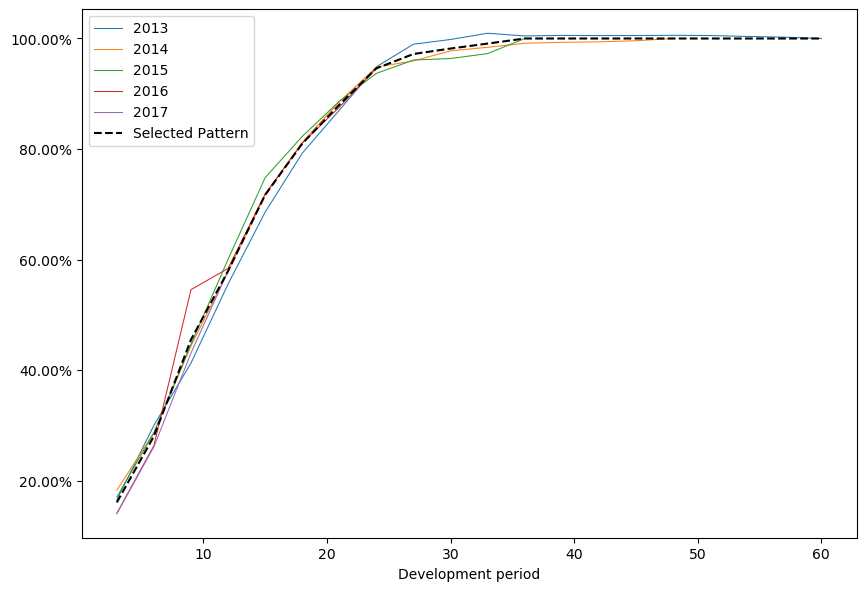

In [18]:
#plot the graph, and make the linewidth of the lines other than the selected pattern smaller
ax = pivdf5.transpose().plot.line(linewidth=0.75)

#change axis labels
ax.set(xlabel='Development period')

# we want to also display the selected pattern from df3new 
selected_pattern = df3new['Development percentages with pick'].tolist()

# add the extra line for our selected pattern. k-- makes it black and dashed so its easier to differentiate between the lines
plt.plot(devprd_list, selected_pattern, 'k--', label = 'Selected Pattern')

# a new formatting function we can use to display the axis scale as percentages
def ypercentformat(x,y):
    return str('{:.2f}'.format(x*100) + '%')

# since we added an extra line we have to manually add the legend
ax.legend()
    
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(ypercentformat))

plt.show()

# Create a function that outputs both graphs!

We will create multiple subfunctions as it is better to make your code more modular. This is because it makes debugging easier and it aids readability.

Pretty much none of the code is brand new, but some has been slightly adapted to be more general. An example of this would be df_latestDevPrd['% ' + column_name +  ' developed'] instead of df_latestDevPrd['% premiums developed]. This is so it can be relevant for all the other possible column names.


In [19]:
#If you want to display the y axis as $50M, you can create a function to do this (we can then call this later on)
def yaxisFormatting(x, y):
    return str('${:.0f}'.format(x/1000000) +'M')

# a new formatting function we can use to display the axis scale as percentages
def ypercentformat(x,y):
    return str('{:.2f}'.format(x*100) + '%')

# this function returns the last valid non na value in the referenced row
def getLastNonNA(x):
    return x[x.last_valid_index()]

# makes our graphs a little bit bigger
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize']=(10, 7)

#Gross Incurred Claims is a special case. we will import a table into this variable so we can have access to BF Prior / Intitial LR
tabledf = pd.read_csv('2017q3.csv')
#remove rows with only NaN values
tabledf.dropna(axis = 0, how = 'all', inplace = True)


def plotEverything(df, column_name):
    listOfParams = createPivTable(df, column_name)
    plotBothGraphs(listOfParams)

# This function creates the pivot table 
def createPivTable(df, column_name):
    df_piv_data= df[['Underwriting YoA','Processing Month', column_name]].copy()
    df_piv_data['Processing Year'] = df_piv_data['Processing Month'].str[:4].astype('int')
    df_piv_data['Processing Month'] = df_piv_data['Processing Month'].str[4:6].astype('int')
    df_piv_data['Development period'] = (df_piv_data['Processing Year']-df_piv_data['Underwriting YoA'])*12 + df_piv_data['Processing Month']
   
    # making a copy of the premiums data so it can be used in case the column name is 'Gross Incurred Claims'
    df_prem_piv_data = df_piv_data.copy()
    df_prem_piv_data.rename({column_name:'Gross Premiums Received'}, inplace = True)
    df_prem_piv_data['Gross Premiums Received'] = df['Gross Premiums Received']
    prem_piv_table = pd.pivot_table(df_prem_piv_data, values='Gross Premiums Received', index=['Underwriting YoA'],
                    columns=['Development period'])
    piv_table = pd.pivot_table(df_piv_data, values=column_name, index=['Underwriting YoA'],
                    columns=['Development period'])
    listOfParams = buildExpectationsTables(df, column_name, df_piv_data, piv_table, prem_piv_table)
    return listOfParams
    
# This function starts the (longer) process of building the expectations graph
def buildExpectationsTables(df, column_name, df_piv_data, piv_table, prem_piv_table):
    df1 = df_piv_data.copy()
    df1.drop(['Processing Year', 'Processing Month'], axis =1, inplace = True)
    df1 = df1[(df1['Development period'] % 3 == 0)]
    year_list = df1.groupby(['Development period'])['Underwriting YoA'].apply(list).to_dict()
    year_name_list= df1['Underwriting YoA'].unique()
    devprd_list = df1['Development period'].unique().tolist()
    development_factor_list, numerators, denominators = [],[],[]
    numerator = 0
    denominator = df1.loc[df1['Development period']==devprd_list[0],column_name].sum()
    numerators.append(np.nan)
    denominators.append(np.nan)
    for i, devprd in enumerate(devprd_list): 
        if devprd != devprd_list[0]:
            numerator = df1.loc[df1['Development period']==devprd,column_name].sum()
            if year_list[devprd] !=  year_list[devprd_list[i-1]]:
                common_years = set(year_list[devprd]) & set(year_list[devprd_list[i-1]])
                numerator = denominator = 0
                for j in common_years:
                    numerator = numerator + df1.loc[((df1['Development period']==devprd) &(df1['Underwriting YoA']==j))][column_name].tolist()[0]
                    denominator = denominator + df1.loc[((df1['Development period']==devprd_list[i-1]) &(df1['Underwriting YoA']==j))][column_name].tolist()[0]
            development_factor_list.append(numerator/denominator)
            numerators.append(numerator)
            denominators.append(denominator)
            denominator = numerator
    development_factor_list.insert(0, np.nan)
    df1new = pd.DataFrame()
    df1new['Development period'] = devprd_list
    df1new['Number of data points'] = [len(k) for k in year_list.values()]
    df1new['Numerator'] = numerators
    df1new['Denominator'] = denominators
    df1new['Development factor'] = development_factor_list
    listOfParams = devPcntWithPick(df,column_name, df1, df1new , year_name_list, piv_table, prem_piv_table, devprd_list)
    return listOfParams

# adds a new column to our dataframe, and asks for user input for picking percentages
def devPcntWithPick(df, column_name, df1, df1new, year_name_list, piv_table, prem_piv_table, devprd_list):    
    overall_devprod = df1new['Development factor'].product()
    dev_pcnt = df1new['Development factor'].cumprod().div(overall_devprod).tolist()
    df1new['Development percentages'] = dev_pcnt    
    dev_pcnt_with_pick = df1new['Development percentages'].copy().tolist()
    df1new['Development percentages with pick'] = dev_pcnt_with_pick
    pickNum =11
    
    #if you want the user to be able to choose pickNum themselves, uncomment the line below
    #pickNum = int(input("Looking at the table above, pick the index including which you would like to be 100%: " ))
    
    if 'Gross Premiums Received' in column_name:
        df1new['temp cumulative product'] = df1new['Development factor'].cumprod().tolist()
        df1new['Development percentages with pick'] = df1new['Development factor'].cumprod().div(df1new['temp cumulative product'][pickNum])
        df1new.drop(['temp cumulative product'], axis = 1, inplace =True) 
    df1new.loc[pickNum:, 'Development percentages with pick'] = 1
    df1new.loc[0,'Development percentages with pick'] =  df1new.loc[1,'Development percentages']/df1new.loc[1,'Development factor']
    listOfParams = createNewTable(df, column_name, df1, df1new, year_name_list, piv_table, prem_piv_table, devprd_list)
    return listOfParams

#creates the new table that contains some ultimate information (latest development period info)
def createNewTable(df, column_name, df1, df1new, year_name_list, piv_table, prem_piv_table, devprd_list):
    df_latestDevPrd = pd.DataFrame()
    df_latestDevPrd['Underwriting YoA'] = year_name_list
    latest_dev_prd = piv_table.apply(pd.Series.last_valid_index, axis=1).tolist()
    df_latestDevPrd['Latest development period'] = latest_dev_prd
    df_latestDevPrd[column_name] = piv_table.apply(getLastNonNA, axis=1).tolist()
    devPcnt = []
    for i in latest_dev_prd:
        devPcnt.append(float(df1new.loc[((df1new['Development period']==i))]['Development percentages with pick'].tolist()[0]))
    df_latestDevPrd['% ' + column_name +  ' developed'] = devPcnt
    df_latestDevPrd['Ultimate ' + column_name] = df_latestDevPrd[column_name] / df_latestDevPrd['% '+ column_name +' developed']
    if 'Gross Incurred Claims' in column_name:
        df_latestDevPrd = appendExtraIncurredColumns(df, column_name,piv_table, df1, df1new, df_latestDevPrd, prem_piv_table, devprd_list)
    listOfParams = ultimateTable(df, column_name,piv_table, df1, df1new, df_latestDevPrd, prem_piv_table, devprd_list)
    return listOfParams

#adds on the extra columns if we are dealing with gross incurred claims. It also selects the correct Incurred Freultimate value 
#depending on the % incurred developed from pattern (CL ultimate if %>=75, BF Ultimate if 30<= % <70, Prior ultimate if % < 30)  
def appendExtraIncurredColumns(df, column_name,piv_table, df1, df1new, df_latestDevPrd, prem_piv_table, devprd_list):
    tempdf= pd.DataFrame()
    tempdf['Premiums Received'] = prem_piv_table.apply(getLastNonNA, axis=1).tolist().copy()
    tempdf['% premiums developed'] = devPcnt
    df_latestDevPrd['Ultimate premium'] =  tempdf['Premiums Received'] / tempdf['% premiums developed']
    df_latestDevPrd['CL ultimate'] = df_latestDevPrd['Gross Incurred Claims'] / df_latestDevPrd['% Gross Incurred Claims developed']
    df_latestDevPrd['Prior ultimate'] = tabledf['BF Prior / Intitial LR'] * df_latestDevPrd['Ultimate premium']
    df_latestDevPrd['BF ultimate'] = (df_latestDevPrd['% Gross Incurred Claims developed']*df_latestDevPrd['CL ultimate'])+((1-df_latestDevPrd['% Gross Incurred Claims developed'])*df_latestDevPrd['Prior ultimate'])
    df_latestDevPrd['Incurred ultimate'] = df_latestDevPrd.apply(alterIncUlt, axis = 1) 
    return df_latestDevPrd

# choose the incurred ultimate value depending on the % inc developed
def alterIncUlt(x):
    if x['% Gross Incurred Claims developed']>=0.75:
        return x['CL ultimate']
    elif ((x['% Gross Incurred Claims developed']>=0.3)&(x['% Gross Incurred Claims developed']<0.75)):
        return x['BF ultimate'] 
    else:
        return x['Prior ultimate']
        
#creates the final pivot table that the expectations graph will ultimately be created from
def ultimateTable(df, column_name, piv_table, df1, df1new, df_latestDevPrd, prem_piv_table, devprd_list):
    df3 = df1.copy()
    df_latestDevPrdCopy = pd.DataFrame()
    df_latestDevPrdCopy[['Underwriting YoA', 'Ultimate ' + column_name]] = df_latestDevPrd[['Underwriting YoA', 'Ultimate ' + column_name]].copy()
    df3 = df3.merge(df_latestDevPrdCopy, on = 'Underwriting YoA', how='left')
    df3['Percentage ' +column_name] = df3[column_name]/df3['Ultimate '+ column_name]
    df3.drop([column_name], axis =1, inplace =True)   
    pivdf3 = pd.pivot_table(df3, values ='Percentage ' +column_name , index = df3['Underwriting YoA'], columns = df3['Development period'])
    # passing parameters as a list so we can call this and the graph creation functions separately  
    listOfParams = [piv_table,column_name, pivdf3,df1new, devprd_list]
    return [piv_table,column_name, pivdf3,df1new, devprd_list, df_latestDevPrd]
    
#plots both of the graphs 
def plotBothGraphs(listOfParams):
    #unpacking the list of parameters
    piv_table = listOfParams[0]
    column_name = listOfParams[1]
    pivdf3 = listOfParams[2]
    df1new = listOfParams[3]
    devprd_list =listOfParams[4]
    
    fig1, axes = plt.subplots(1, 2)
    #setting a figure title
    fig1.suptitle('GRAPHS:')
    piv_table.transpose().plot(ax = axes[0]) 
    pivdf3.transpose().plot(ax = axes[1], linewidth = 0.75) 
    #plot the first graph
    axes[0].set(xlabel='Development period', ylabel=column_name, title=column_name)
    axes[0].get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(yaxisFormatting))
    #plot the expectations graph
    axes[1].set(xlabel='Development period')
    selected_pattern = df1new['Development percentages with pick'].tolist()
    plt.plot(devprd_list, selected_pattern, 'k--', label = 'Selected Pattern')
    axes[1].legend()
    axes[1].get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(ypercentformat))
    plt.show()

# Calling the function

Looking at the table above, pick the index including which you would like to be 100%: 11


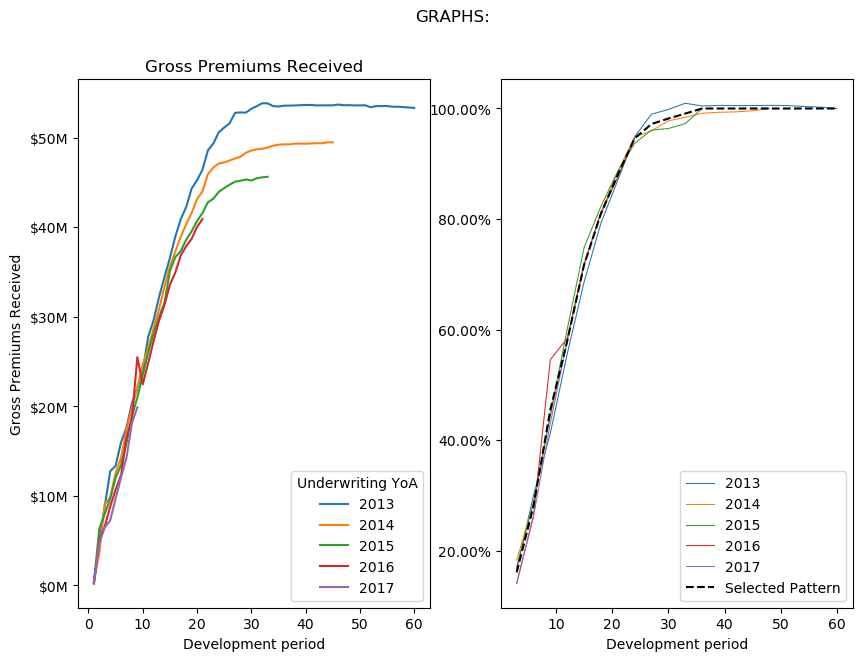

Looking at the table above, pick the index including which you would like to be 100%: 15


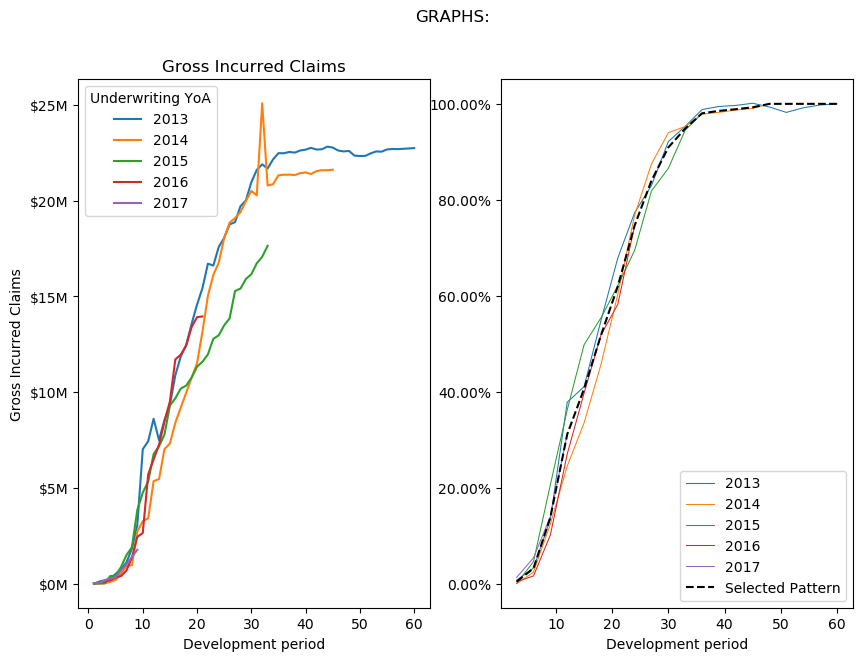

Looking at the table above, pick the index including which you would like to be 100%: 13


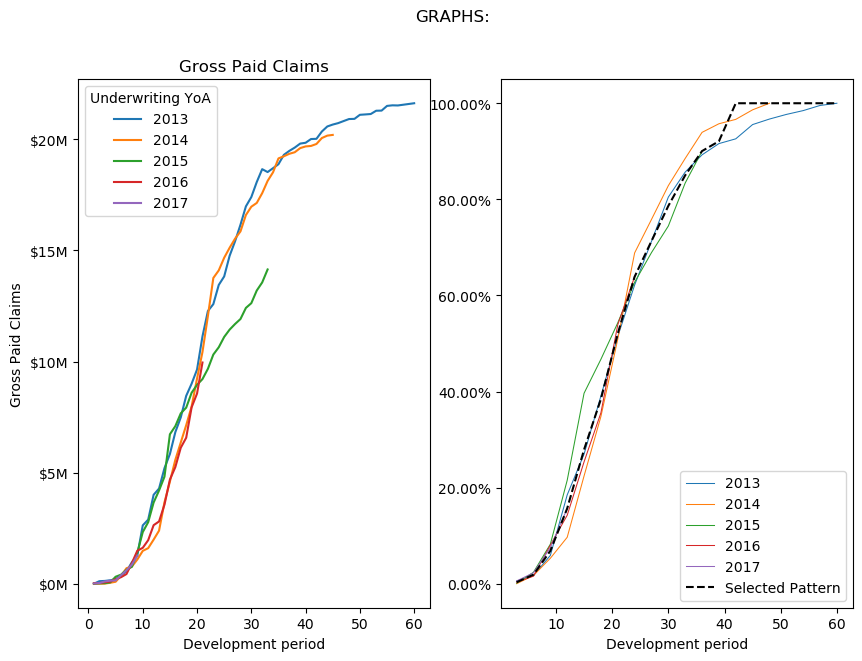

In [20]:
plotEverything(df, 'Gross Premiums Received')
plotEverything(df, 'Gross Incurred Claims')
plotEverything(df, 'Gross Paid Claims')